In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [43]:
from google.colab.patches import cv2_imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

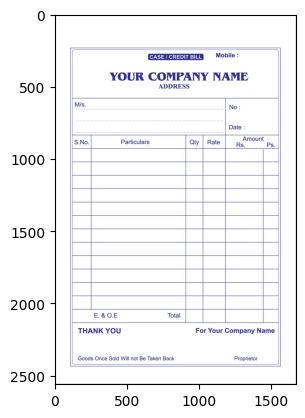

In [44]:
img = mpimg.imread('/content/bill book.jpg')
imgplt = plt.imshow(img)
plt.imshow


In [45]:
print(img.shape)

(2560, 1667, 3)


In [46]:
#  resize the image
img = cv2.resize(img,(1500,800))

<function matplotlib.pyplot.show(close=None, block=None)>

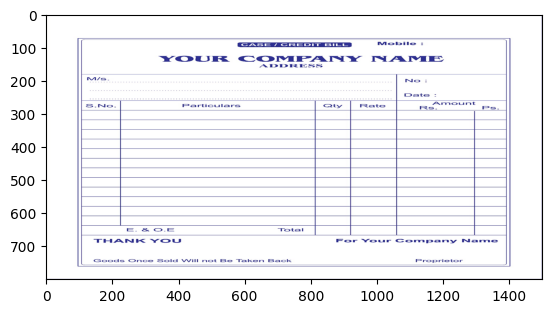

In [47]:
plt.imshow(img)
plt.show

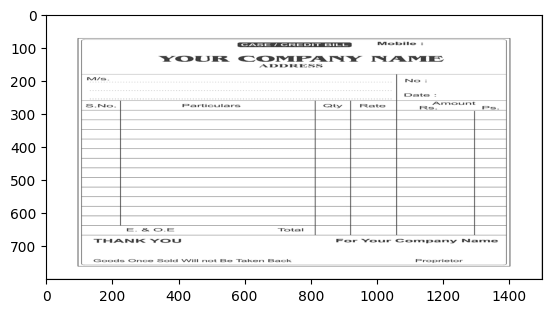

In [48]:
#  removing the noise
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.show()

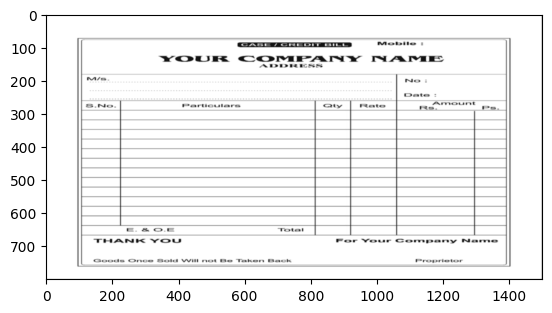

In [49]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap = 'gray')
plt.show()

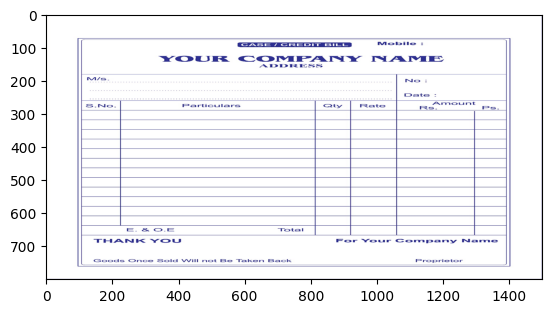

In [50]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

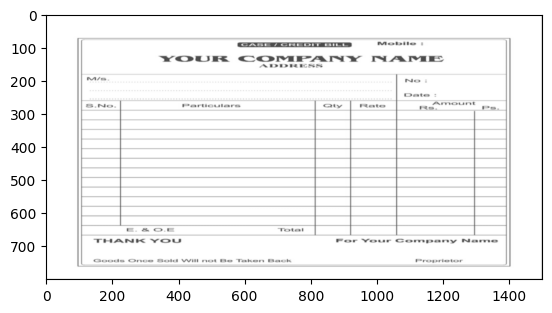

In [51]:
#  edge detection
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()
plt.imshow(regen)
plt.show()

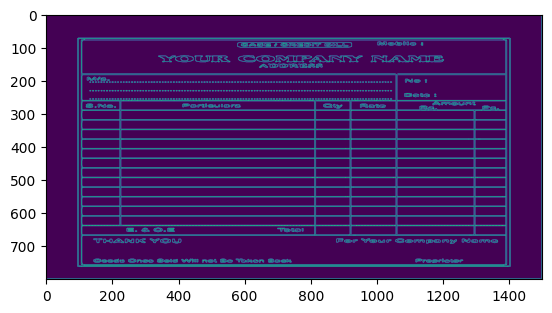

In [52]:
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()
plt.imshow(orig_edge)
plt.show()

In [53]:
#  countours extraction

contours, _ =cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

1791


In [54]:
contours = sorted( contours, reverse = True, key = cv2.contourArea )

In [55]:
#  select the best contours region
for c in contours:
  p = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.01*p, True)

  if len(approx) == 4:
    target = approx
    break

print(target.shape)

(4, 1, 2)


In [56]:
#  reorder target contor

def reorder(h):
  h = h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype= np.float32)
  add = h.sum(axis = 1)
  hnew [3] =h[np.argmax(add)]
  hnew [1] =h[np.argmax(add)]
  diff = np.diff(h, axis = 1)
  hnew [0] =h[np.argmax(add)]
  hnew [2] =h[np.argmax(add)]

  return hnew


In [57]:
reorder = reorder(target)
print('*********')
print(reorder)

[[  95   73]
 [  95  761]
 [1404  761]
 [1404   73]]
*********
[[1404.  761.]
 [1404.  761.]
 [1404.  761.]
 [1404.  761.]]


In [58]:
#  project to a fixed screen

input_representation = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])


In [59]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(orig, M,(800,800))

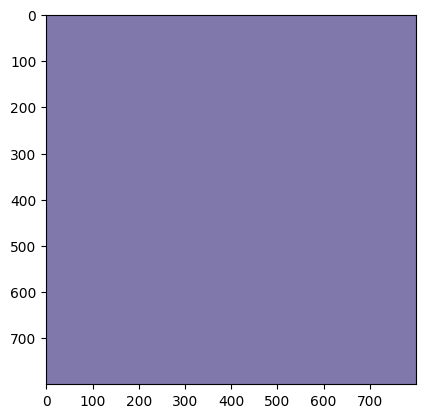

In [60]:
plt.imshow(ans)
plt.show()

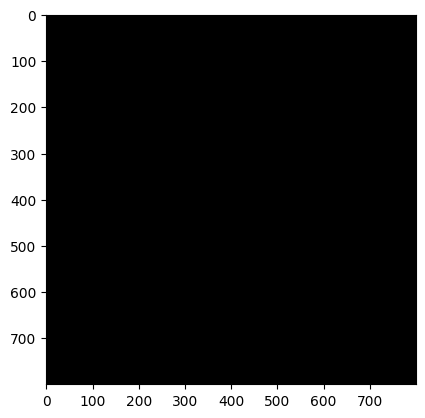

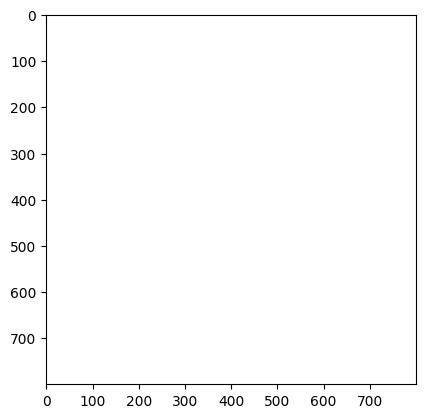

In [61]:
res = cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
b_res = cv2.GaussianBlur(res,(3,3), 0)
plt.imshow(res, cmap = 'gray')
plt.show()

plt.imshow(res, cmap = 'binary')
plt.show()
